In [22]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
import pandas as pd 


inputContacts = pd.read_csv('https://raw.githubusercontent.com/ScottishCovidResponse/scrc-vis-modelling/master/ContactTracing/data/2020_07_01_newSet/contacts_covid_model.csv',
                           engine='python')
inputContacts.head()

,time,from,to,weight,label
0,0,14298,14357,100,Restaurant
1,0,425,6831,100,School
2,0,301,15510,100,ConstructionSite
3,0,1779,18245,100,Shop
4,0,9585,18081,100,School


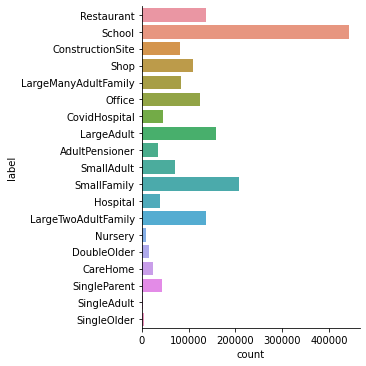

In [23]:
import seaborn as sns
sns.catplot(y='label',kind= 'count',
           data= inputContacts)

In [64]:
inputContacts['from']

TypeError: 'NoneType' object is not subscriptable

In [62]:
def returnContactLocation(sourceNode,targetNode,timeInfection):
    location = ''
    isMatch = (inputContacts['from'] == sourceNode) & (inputContacts['to'] == targetNode) & (inputContacts['time'] == timeInfection)
    if isMatch.any():
        location  = str(inputContacts[isMatch]['label'].values[0])
        
    else:
        print("Contact not found at this given time")
    return location

#Testing the function
sourceNode = 13
targetNode = 5
timeInfection = 5
returnContactLocation(sourceNode, targetNode, timeInfection)
    
    
    
    
    
    

TypeError: 'NoneType' object is not subscriptable

In [25]:
eventdf = pd.read_csv('https://raw.githubusercontent.com/ScottishCovidResponse/scrc-vis-modelling/master/ContactTracing/data/2020_07_01_newSet/events.csv')
eventdf .head()

,time,eventType,id,newStatus,additionalInfo
0,0,InfectionEvent,2048,EXPOSED,This case was an initial infection
1,0,InfectionEvent,4101,EXPOSED,This case was an initial infection
2,0,InfectionEvent,4104,EXPOSED,This case was an initial infection
3,0,InfectionEvent,2059,EXPOSED,This case was an initial infection
4,0,InfectionEvent,13,EXPOSED,This case was an initial infection


In [26]:
groupedByID = eventdf.groupby(['id'])

In [27]:
timeSeriesPerNode = groupedByID['time'].apply(list)
timeSeriesPerNode

id
0                    [3, 6, 8, 9, 9, 10, 10, 17]
1                [8, 10, 13, 14, 16, 17, 18, 18]
2                                 [9, 9, 11, 14]
3             [8, 9, 11, 12, 12, 13, 14, 15, 15]
4       [15, 16, 23, 26, 27, 27, 28, 29, 30, 30]
                          ...                   
9995                [13, 21, 22, 23, 24, 24, 27]
9996              [4, 8, 10, 11, 12, 12, 16, 23]
9997                                [10, 11, 12]
9998                                  [2, 4, 12]
9999            [12, 17, 19, 20, 22, 23, 23, 26]
Name: time, Length: 9998, dtype: object

In [28]:
eventdf[eventdf['id']==0]

,time,eventType,id,newStatus,additionalInfo
2605,3,InfectionEvent,0,EXPOSED,This case was a random infection
8089,6,VirusEvent,0,PRESYMPTOMATIC,Old Status : EXPOSED
13361,8,VirusEvent,0,SYMPTOMATIC,Old Status : PRESYMPTOMATIC
14307,9,AlertEvent,0,REQUESTED_TEST,NaN
16929,9,VirusEvent,0,SEVERELY_SYMPTOMATIC,Old Status : SYMPTOMATIC
17333,10,AlertEvent,0,AWAITING_RESULT,NaN
18048,10,AlertEvent,0,TESTED_POSITIVE,NaN
42886,17,VirusEvent,0,DEAD,Old Status : SEVERELY_SYMPTOMATIC


In [29]:
eventTypesPerNode = groupedByID['eventType'].apply(list)

In [30]:
eventdf.head()
virusEventsDF = eventdf[eventdf['eventType'] == 'VirusEvent'] 
virusEventsDF.head()

,time,eventType,id,newStatus,additionalInfo
1499,1,VirusEvent,2048,ASYMPTOMATIC,Old Status : EXPOSED
1500,1,VirusEvent,4104,PRESYMPTOMATIC,Old Status : EXPOSED
1501,1,VirusEvent,2059,ASYMPTOMATIC,Old Status : EXPOSED
1502,1,VirusEvent,4111,PRESYMPTOMATIC,Old Status : EXPOSED
1503,1,VirusEvent,37,ASYMPTOMATIC,Old Status : EXPOSED


In [31]:
groupedByID_vir = virusEventsDF.groupby(['id'])

In [32]:
statesPerNode_vir = groupedByID_vir['newStatus'].apply(list)

In [33]:
statesPerNode_vir 

id
0       [PRESYMPTOMATIC, SYMPTOMATIC, SEVERELY_SYMPTOM...
1                [PRESYMPTOMATIC, SYMPTOMATIC, RECOVERED]
2                               [ASYMPTOMATIC, RECOVERED]
3       [PRESYMPTOMATIC, SYMPTOMATIC, SEVERELY_SYMPTOM...
4       [PRESYMPTOMATIC, SYMPTOMATIC, SEVERELY_SYMPTOM...
                              ...                        
9995             [PRESYMPTOMATIC, SYMPTOMATIC, RECOVERED]
9996    [PRESYMPTOMATIC, SYMPTOMATIC, SEVERELY_SYMPTOM...
9997                            [ASYMPTOMATIC, RECOVERED]
9998                            [ASYMPTOMATIC, RECOVERED]
9999    [PRESYMPTOMATIC, SYMPTOMATIC, SEVERELY_SYMPTOM...
Name: newStatus, Length: 9998, dtype: object

In [34]:
asymptomatic = statesPerNode_vir.apply(lambda x: 'ASYMPTOMATIC' in x)
asymptomatic 

id
0       False
1       False
2        True
3       False
4       False
        ...  
9995    False
9996    False
9997     True
9998     True
9999    False
Name: newStatus, Length: 9998, dtype: bool

In [35]:
statesPerNode_vir[asymptomatic.values]

id
2       [ASYMPTOMATIC, RECOVERED]
5       [ASYMPTOMATIC, RECOVERED]
6       [ASYMPTOMATIC, RECOVERED]
7       [ASYMPTOMATIC, RECOVERED]
9       [ASYMPTOMATIC, RECOVERED]
                  ...            
9990    [ASYMPTOMATIC, RECOVERED]
9991    [ASYMPTOMATIC, RECOVERED]
9993    [ASYMPTOMATIC, RECOVERED]
9997    [ASYMPTOMATIC, RECOVERED]
9998    [ASYMPTOMATIC, RECOVERED]
Name: newStatus, Length: 4966, dtype: object

In [36]:
symptomaticIDS = statesPerNode_vir.apply(lambda x: "SYMPTOMATIC" in x)

In [37]:
timeSeriesPerNode_vir = groupedByID_vir['time'].apply(list)
timeSeriesPerNode_vir[symptomaticIDS.values]

id
0          [6, 8, 9, 17]
1           [10, 13, 16]
3        [9, 11, 12, 13]
4       [23, 26, 27, 28]
8       [11, 16, 19, 24]
              ...       
9992      [8, 9, 10, 16]
9994      [5, 6, 10, 13]
9995        [21, 22, 27]
9996     [8, 10, 16, 23]
9999    [17, 19, 22, 26]
Name: time, Length: 5032, dtype: object

In [38]:
## build a function thay checks the status of a node X at a given time t 

def returnDiseaseStatusForNodeAtGivenTime(nodeID, queryTime):
    statusofSource = ''
    if queryTime < timeSeriesPerNode_vir[nodeID][0]:
         print("An exposed individual infecting others before becoming presymptomatic!!")
    else:
        timeid = timeSeriesPerNode_vir[nodeID].index(queryTime)
        statusofSource = statesPerNode_vir[nodeID][timeid]
    return statusofSource








In [39]:
nodeID = 4
print(statesPerNode_vir[nodeID])
print(timeSeriesPerNode_vir[nodeID]) 

['PRESYMPTOMATIC', 'SYMPTOMATIC', 'SEVERELY_SYMPTOMATIC', 'RECOVERED']
[23, 26, 27, 28]


In [40]:
infectionTime = 27
returnDiseaseStatusForNodeAtGivenTime(nodeID, infectionTime)

'SEVERELY_SYMPTOMATIC'

In [41]:
nodeAges = pd.read_csv('https://raw.githubusercontent.com/ScottishCovidResponse/scrc-vis-modelling/master/ContactTracing/data/2020_07_01_newSet/ids_Paul.csv')
nodeAges['age']

0         1
1         5
2        17
3        29
4        68
         ..
19995    83
19996    33
19997    38
19998    67
19999     0
Name: age, Length: 20000, dtype: int64

/Users/ypi/PycharmProjects/pythonProject/venv/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Node Ages')

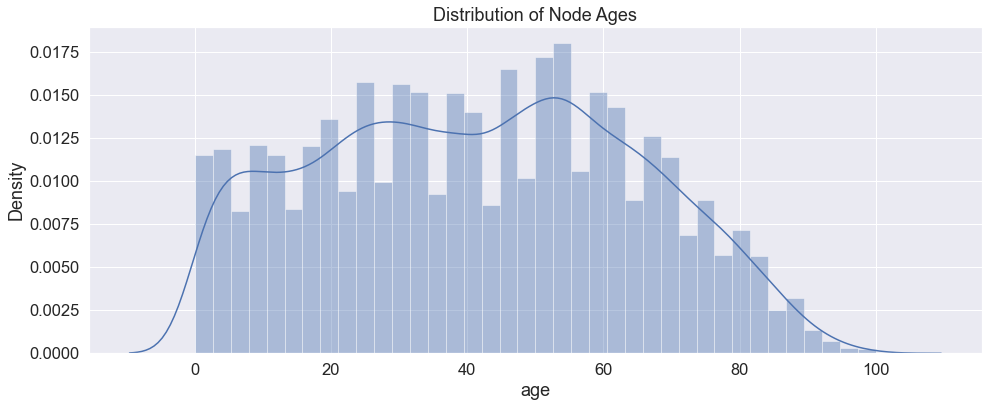

In [42]:
import matplotlib.pyplot as plt
sns.set(font_scale=1.5)
plt.figure(figsize=(16, 6))
sns.distplot(nodeAges['age']).set_title('Distribution of Node Ages')

In [43]:
compartments= pd.read_csv('https://raw.githubusercontent.com/ScottishCovidResponse/scrc-vis-modelling/master/ContactTracing/data/2020_07_01_newSet/Compartments.csv')
compartments.head()

,time,s,e,a,p,sym,sev,r,d
0,0,9000,1000,0,0,0,0,0,0
1,1,8553,1196,132,119,0,0,0,0
2,2,8134,1304,253,238,35,0,36,0
3,3,7580,1557,358,326,85,1,93,0
4,4,6929,1801,483,449,145,12,181,0


In [44]:
c_melted = compartments.melt('time')

In [45]:
import altair as alt



# mark_rect A filled rectangle, used for heatmaps


alt.Chart(
c_melted,
    title = 'Compartment Value Over Time').mark_rect().encode(

x='time:O',
    y= 'variable',
    color=alt.Color('value:Q', scale=alt.Scale( scheme='yelloworangebrown'))


).properties(width=850)

alt.Chart(...)

In [46]:
alt.Chart(c_melted).mark_line().encode(
x = 'time:O',
    y='value',
    color = 'variable'



).properties(width=850)

alt.Chart(...)

In [55]:
def removeWhiteSpace(textToParse):
    """This removes the whitespaces from a given piece of string"""
    return "".join(textToParse.split())

def parseNodeTimeObject(nodeText):
    nodeText  =removeWhiteSpace(nodeText)
    x = re.split('\(',nodeText)
    nodeID= x[0]
    time  = re.split('\)',x[1])[0]
    return (nodeID, time)
    
def parseInfectedNodeList(textToParse):
    textToParse  = removeWhiteSpace(textToParse)
    infectedNode =    re.split(',',re.split('\]$',re.split('^\[',textToParse)[1])[0]) 
    return infectedNode

In [96]:
import re
def convertInfectionMapToNetworkXGraph(infectionMapFileName):
    
    
    
    G = nx.DiGraph()

    # This is the name of the attribute that each node/edge has, currently only infection time
    attributeText1 = "infectionTime"

    with open(infectionMapFileName) as f:
        #read_data = f.read()
        lines = f.readlines()
        #print("file", f)
        for line in lines[:20]:
            if (line == '\n'):
                pass
            else:
                infectionTimes = []
                temSplit = re.split('->',line)
                if len(temSplit) == 2:
                    tempSourceNode = parseNodeTimeObject(temSplit[0])
                    print("SourceNode:", tempSourceNode)
                    
                    G.add_node(tempSourceNode[0],infectionTime = int(tempSourceNode[1]))
                    tempTargetNodes = parseInfectedNodeList(temSplit[1])
                    
                    for nodeText in tempTargetNodes:
                        tempTargetNode = parseNodeTimeObject(nodeText)
                        G.add_node(tempTargetNode[0],infectionTime = int(tempTargetNode[1]))
                        G.add_edge(tempSourceNode[0],tempTargetNode[0], infectionTime= int(tempSourceNode[1]))
                
                else: 
                    #### inside the infection chain
                    
                    
                    #print("This is inside the Infection Chain");
                    tempSourceNode = parseNodeTimeObject(temSplit[1]);
                    #print("SourceNode:", tempSourceNode, " -- this should be already in the graph, not adding");

                    tempTargetNodes = parseInfectedNodeList(temSplit[2]);
                    #print("TargetNodes:", tempTargetNodes);
                    for nodeText in tempTargetNodes:
                        tempTargetNode = parseNodeTimeObject(nodeText);
                        #print("Adding TargetNode:", tempTargetNode);
                        G.add_node(tempTargetNode[0], infectionTime=int(tempTargetNode[1]))
                        G.add_edge(tempSourceNode[0], tempTargetNode[0], infectionTime=int(tempSourceNode[1]))
    return G
                    
                    

In [97]:
G = convertInfectionMapToNetworkXGraph('/Users/ypi/Desktop/infectionMap_NoRandom.txt')

SourceNode: ('2', '0')
SourceNode: ('5', '0')


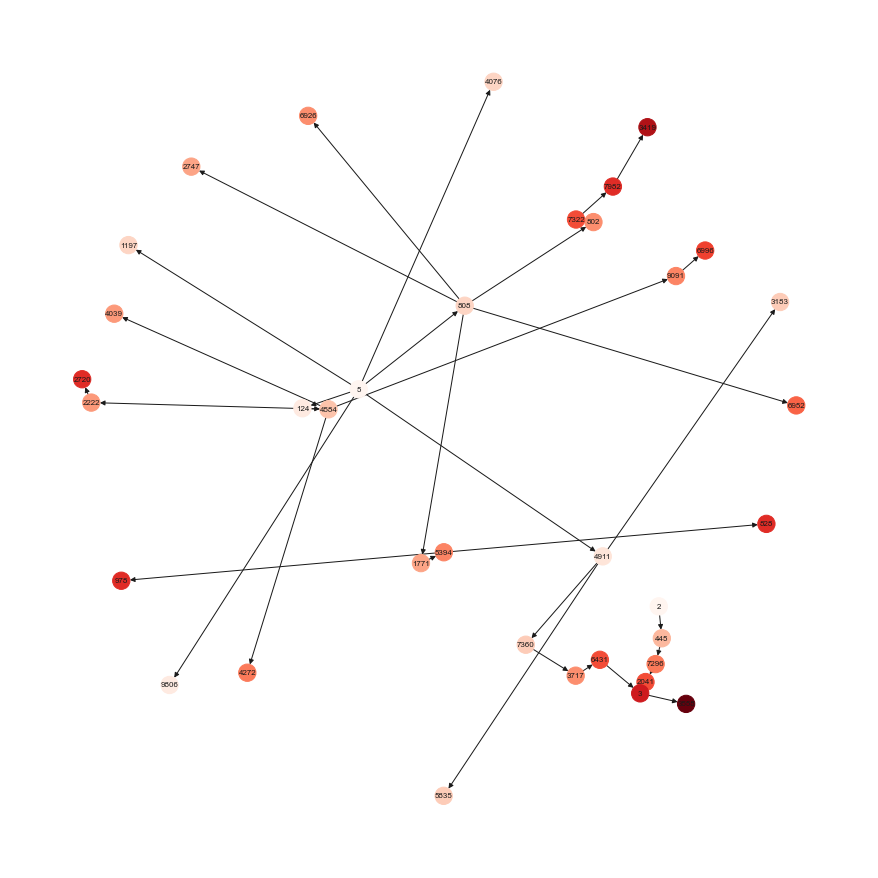

In [107]:
plt.figure(1,figsize=(12,12))
pos = nx.spring_layout(G)
nodes = G.nodes(data=True)
colors = [v['infectionTime'] for u,v in nodes]


nx.draw(G, pos=pos, cmap=plt.cm.Reds,node_color= colors)
nx.draw_networkx_labels(G, pos=pos, font_size = 8)
plt.show()

In [101]:
nodes = G.nodes(data=True)
colors = [v['infectionTime'] for u,v in nodes]
print(colors)

[0, 8, 14, 18, 0, 2, 2, 3, 5, 5, 5, 7, 11, 11, 13, 14, 21, 19, 6, 6, 6, 12, 18, 23, 31, 10, 10, 12, 12, 16, 13, 21, 21, 18, 21, 26]


In [82]:
import pandas as pd
import numpy as np
import re
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:


virusEventsDF = None
statesPerNode_vir = None
timeSeriesPerNode_vir = None
eventTypesPerNode_vir  = None


def loadDataFilesToDataFrames():
    global inputContacts 
    global eventsDF
    global nodeAges
    global virusEventsDF
    global statesPerNode_vir
    global timeSeriesPerNode_vir
    global eventTypesPerNode_vir
    
    inputContacts = pd.read_csv('https://raw.githubusercontent.com/ScottishCovidResponse/scrc-vis-modelling/master/ContactTracing/data/2020_07_01_newSet/contacts_covid_model.csv')
    
    eventsDF = pd.read_csv('https://raw.githubusercontent.com/ScottishCovidResponse/scrc-vis-modelling/master/ContactTracing/data/2020_07_01_newSet/events.csv')
    
    nodeAges = pd.read_csv('https://raw.githubusercontent.com/ScottishCovidResponse/scrc-vis-modelling/master/ContactTracing/data/2020_07_01_newSet/ids_Paul.csv')
    
    virusEventsDF = eventsDF[eventsDF['eventType']=='VirusEvent']
    groupedByID_vir = virusEventsDF.groupby(['id'])
    statesPerNode_vir = groupedByID_vir['newStatus'].apply(list)
    timeSeriesPerNode_vir = groupedByID_vir['time'].apply(list)
    eventTypesPerNode_vir = groupedByID_vir['eventType'].apply(list)
    


In [84]:
loadDataFilesToDataFrames()

In [104]:
def getNodeAge(nodeID):
    nodeID  = int(nodeID)
    nodeAge = nodeAges['age'][nodeID]
    
    return nodeAge

import pandas as pd
import numpy as np
import re
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

""" This is a processing script that contains a set of functions to read in 
an infection map file and generate an internal networkx graph which can then 
be exported to viz-friendly formats such as graphml. """

"""
Compared to the previous version where the code was just reading the infection map, this version
reads through the several files, computes statistics, and integrates these within the graph data
structure. So contains a number of functions to help with these.
"""



def getContactLocation(sourceNode, targetNode, timeOfInfection):
    """Returns the location of an interaction for nodes `sourceNode` and `targetNode` at a given time `timeOfInfection`"""
    """Requires the contact related file to be loaded and arrays to be filled in"""
    locationLabel = ""
    sourceNode = int(sourceNode)
    targetNode = int(targetNode)
    timeOfInfection = int(timeOfInfection)
    cond1 = (inputContacts['from'] == sourceNode) & (inputContacts['to'] == targetNode) & (inputContacts['time'] == timeOfInfection)
    cond2 = (inputContacts['from'] == targetNode) & (inputContacts['to'] == sourceNode) & (inputContacts['time'] == timeOfInfection)
    isMatch = cond1 | cond2
    #isMatch = (inputContacts['from'] == sourceNode) & (inputContacts['to'] == targetNode) & (inputContacts['time'] == timeOfInfection)
    if isMatch.any():
        locationLabel = str(inputContacts[isMatch]['label'].values[0])
    else:
        print("Contact not found at this given time: ", sourceNode, targetNode, timeOfInfection)
        locationLabel = "NOT_FOUND"
    return locationLabel

def getNodeAge(nodeID):
    nodeID = int(nodeID)
    nodeAge = -1
    if not nodeAges.empty:
        nodeAge = nodeAges['age'][nodeID]
    return nodeAge


def getDiseaseStatusForNodeAtGivenTime(nodeID, queryTime):
    """Returns the disease status for a node `nodeID` at a given time"""
    """Requires the event related files to be loaded and arrays to be filled in"""
    statusOfSource = "EXPOSED"
    nodeID = int(nodeID)
    queryTime = int(queryTime)
    if queryTime < timeSeriesPerNode_vir[nodeID][0]:
        # This probably shouldn't happen -- someone who is exposed infecting before becoming presymptomatic
        print("An exposed individual infecting others before becoming presymptomatic!!")
    else:
        timeIndex = np.searchsorted(timeSeriesPerNode_vir[nodeID], queryTime, side='right')
        #print(timeIndex)
        statusOfSource = statesPerNode_vir[nodeID][timeIndex - 1]
        # A minor adjustment for those agents who infected others on the day of their recovery or death
        # the adjustment is to register their previous status as the status of infection
        if statusOfSource == 'RECOVERED' or  statusOfSource == 'DEAD':
            statusOfSource = statesPerNode_vir[nodeID][timeIndex - 2]
    return statusOfSource
    
    

In [105]:
def removeWhiteSpace(textToParse):
    return ''.join(textToParse.split())

def parseNodeTimeObject(nodeText):
    nodeText = removeWhiteSpace(nodeText)
    x = re.split('\(', nodeText)
    nodeID = x[0]
    time = re.split('\)',x[1])[0]
    return (nodeID,time)

def parseInfectedNodesList(textToParse):
    textToParse = removeWhiteSpace(textToParse)
    infectedNodes = re.split(',', re.split('\]$', re.split('^\[', textToParse)[1])[0]);
    return infectedNodes

In [134]:
import re



#### sourcenode &&&&& targetnode

def convertInfectionMapToNetworkXGraph(infectionMapFileName):
    
    
    
    G = nx.DiGraph()

    # This is the name of the attribute that each node/edge has, currently only infection time
    attributeText1 = "infectionTime"
    
     # These are the diagnostic arrays used to compute statistics on the graph while structuring the graph
    # They are outputted in addition to the graph itself
    
    generationTimesDistribution = []
    infectionSourcesStatusDistributions = []
    infectionLocationDistributions = [ ]
    
    with open(infectionMapFileName) as f:
        # read_data = f.read()
        lines = f.readlines()
        # print("file", f)
        for line in lines[:100]:
            if (line == '\n'):
                pass;
                # print ("This is an empty line!");
            else:
                infectionTimes = []
                tempSplit  = re.split('->',line)
                
                if len(tempSplit) ==2:
                    tempSourceNode = parseNodeTimeObject(tempSplit[0]) 
                    ### input is like 235(2)
                    G.add_node(tempSourceNode[0], infectionTime = int(tempSourceNode[1]),
                              age= getNodeAge(tempSourceNode[0]))
                    tempTargetNodes = parseInfectedNodesList(tempSplit[1])
                    
                    for nodeText in tempTargetNodes:
                        tempTargetNode = parseNodeTimeObject(nodeText)
                        G.add_node(tempTargetNode[0],infectionTime = int(tempTargetNode[1]),
                                  age= getNodeAge(tempTargetNode[0]))
                        
                        # Add infectionTime, infectionLocation, theStatusOfSource to the edge
                        infectionLocation = getContactLocation(tempSourceNode[0], tempTargetNode[0],
                                                               int(tempTargetNode[1]))
                        sourceStatus = getDiseaseStatusForNodeAtGivenTime(tempSourceNode[0],int(tempTargetNode[1]))
                        ### get the status of sourcenode when target node get infected
                        
                        G.add_edge(tempSourceNode[0],tempTargetNode[0],infectionTime = int(tempTargetNode[1]),
                                contactLocation = infectionLocation , sourceDiseaseStatus = sourceStatus  
                                  )
                        
                        ### the time source took to infect the targrt
                        infectionTimes.append(int(tempTargetNode[1])-int(tempSourceNode[1]))
                        
                        infectionSourcesStatusDistributions.append(sourceStatus)
                        infectionLocationDistributions.append(infectionLocation)
                        
                        nx.set_node_attributes(G,{tempSourceNode[0]: np.median(infectionTimes)},name = 'generationTime')
                        generationTimesDistribution.append(np.median(infectionTimes))
                
                else:
                    infectionTimes = []
                    # print("This is inside the Infection Chain");
                    tempSourceNode = parseNodeTimeObject(tempSplit[1]);
                    # print("SourceNode:", tempSourceNode, " -- this should be already in the graph, not adding");

                    tempTargetNodes = parseInfectedNodesList(tempSplit[2]);
                    # print("TargetNodes:", tempTargetNodes);
                    for nodeText in tempTargetNodes:
                        tempTargetNode = parseNodeTimeObject(nodeText);
                        # print("Adding TargetNode:", tempTargetNode);
                        G.add_node(tempTargetNode[0], infectionTime=int(tempTargetNode[1]), age=getNodeAge(tempTargetNode[0]))
                        
                        infectionLocation = getContactLocation(tempSourceNode[0], tempTargetNode[0],
                                                              int(tempTargetNode[1]))
                        sourceStatus = getDiseaseStatusForNodeAtGivenTime(tempSourceNode[0],int(tempTargetNode[1]))
                        ### get the status of sourcenode when target node get infected
                        
                        G.add_edge(tempSourceNode[0],tempTargetNode[0],infectionTime = int(tempTargetNode[1]),
                                contactLocation = infectionLocation , sourceDiseaseStatus = sourceStatus  
                                  )
                        
                        ### the time source took to infect the targrt
                        infectionTimes.append(int(tempTargetNode[1])-int(tempSourceNode[1]))
                        
                        infectionSourcesStatusDistributions.append(sourceStatus)
                        infectionLocationDistributions.append(infectionLocation)
                        
                        nx.set_node_attributes(G,{tempSourceNode[0]: np.median(infectionTimes)},name = 'generationTime')
                        generationTimesDistribution.append(np.median(infectionTimes))
                        
                
    return [G,generationTimesDistribution, infectionSourcesStatusDistributions, infectionLocationDistributions]
                        

                    
    
    

In [135]:
G = convertInfectionMapToNetworkXGraph('/Users/ypi/Desktop/infectionMap.txt')

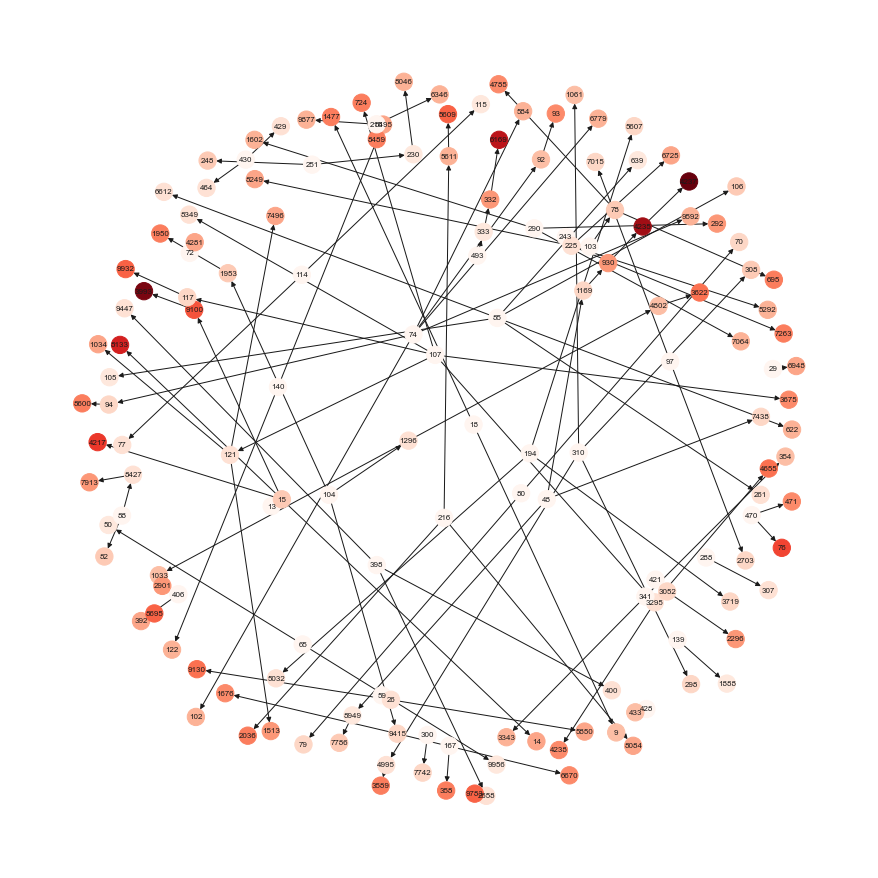

In [136]:
plt.figure(1,figsize=(12,12))
pos = nx.spring_layout(G[0])
nodes = G[0].nodes(data=True)
colors = [v['infectionTime'] for u,v in nodes]


nx.draw(G[0], pos=pos, cmap=plt.cm.Reds,node_color= colors)
nx.draw_networkx_labels(G[0], pos=pos, font_size = 8)
plt.show()

/Users/ypi/PycharmProjects/pythonProject/venv/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ypi/PycharmProjects/pythonProject/venv/lib/python3.6/site-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


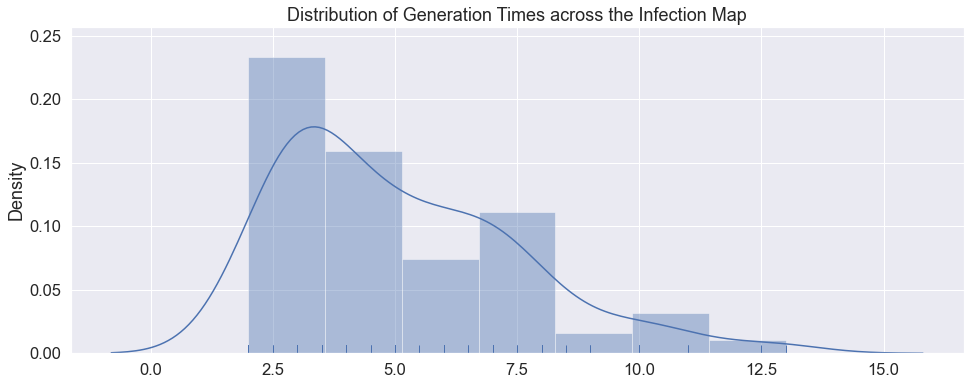

In [137]:
sns.set(font="Helvetica")
sns.set(font_scale=1.5)
plt.figure(figsize=(16, 6))
sns.distplot(G[1], rug=True).set_title("Distribution of Generation Times across the Infection Map");

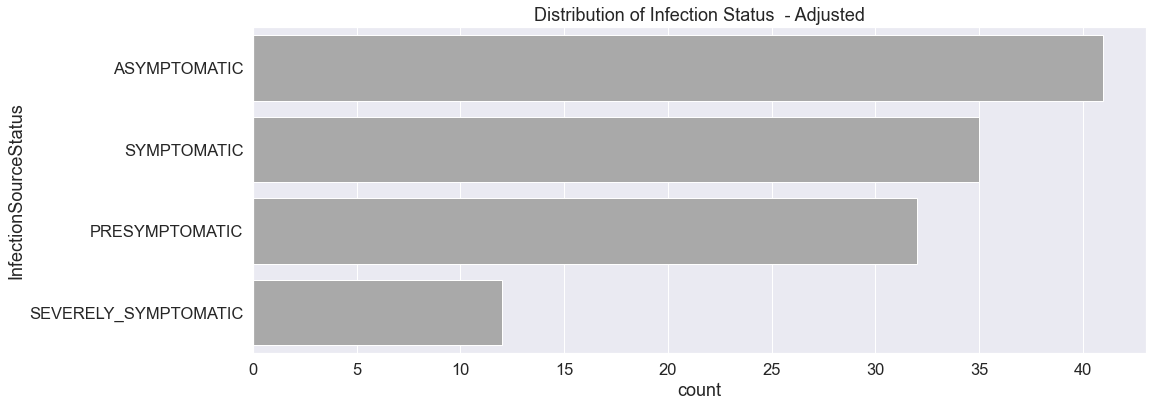

In [138]:
infectionSourceStatusDistributions = G[2]
plot_df = pd.DataFrame(infectionSourceStatusDistributions,columns =['InfectionSourceStatus']) 

sns.set(font="Helvetica")
sns.set(font_scale=1.5)
plt.figure(figsize=(16, 6))
sns.countplot(data = plot_df, y = "InfectionSourceStatus", color="#A9A9A9", order = plot_df['InfectionSourceStatus'].value_counts().index).set_title("Distribution of Infection Status  - Adjusted");
#sns.catplot(y="newStatus", kind="count", data=infectionSourceStatusDistributions, color="#A9A9A9");

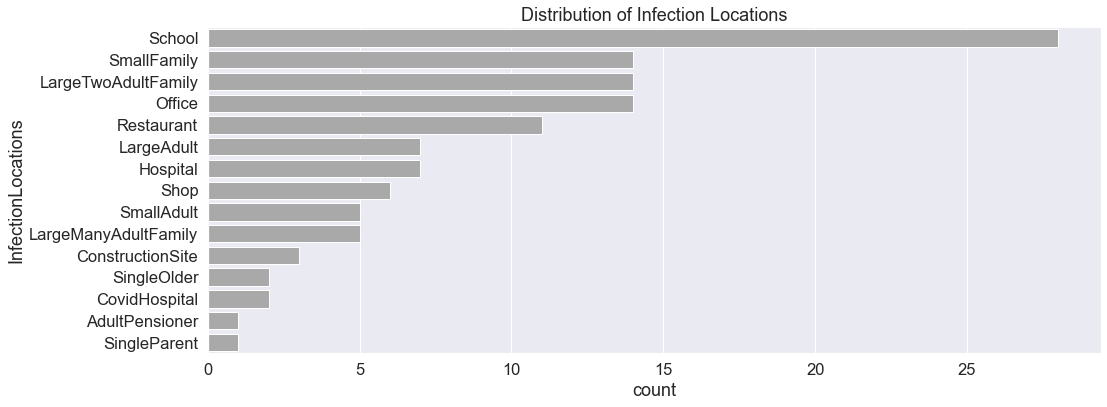

In [139]:
infectionLocationDistributions = G[3]
plot_df = pd.DataFrame(infectionLocationDistributions,columns =['InfectionLocations']) 

sns.set(font="Helvetica")
sns.set(font_scale=1.5)
plt.figure(figsize=(16, 6))
sns.countplot(data = plot_df, y = "InfectionLocations", color="#A9A9A9", order = plot_df['InfectionLocations'].value_counts().index).set_title("Distribution of Infection Locations");
#sns.catplot(y="newStatus", kind="count", data=infectionSourceStatusDistributions, color="#A9A9A9");

In [143]:
l = [c for c in sorted(nx.weakly_connected_components(G[0]), key = len,reverse= True)]

In [141]:
#### all infection chain 

[c for c in nx.weakly_connected_components(G[0]) ]

[{'13', '14', '15', '3993', '4217', '8133', '9100'},
 {'1477', '18', '9'},
 {'29', '6948'},
 {'1169', '4235', '4237', '48', '7438', '7786', '8949', '930'},
 {'26', '5850', '59', '9130'},
 {'50', '65', '9956'},
 {'4281', '72'},
 {'102', '584', '6779', '74', '8600', '92', '93', '94', '9592'},
 {'70', '79', '80'},
 {'105', '106', '261', '622', '639', '6612', '85'},
 {'7913', '82', '8427', '88'},
 {'2703', '7015', '97'},
 {'103', '4785', '695', '78'},
 {'1033',
  '104',
  '1296',
  '1676',
  '1950',
  '1953',
  '2901',
  '3622',
  '4802',
  '6670',
  '9415'},
 {'1034',
  '107',
  '117',
  '121',
  '1513',
  '3295',
  '3675',
  '4238',
  '4655',
  '724',
  '7496',
  '8349',
  '9932'},
 {'114', '115', '77'},
 {'139', '1888'},
 {'122', '140', '8489', '8495'},
 {'167', '358'},
 {'194', '3719', '5032', '5607'},
 {'215', '6346', '9877'},
 {'2036', '216', '5609', '5611', '8084'},
 {'225', '243', '5292', '6725', '7263', '8249'},
 {'230', '248', '251', '8046'},
 {'288', '307'},
 {'1602', '290', '29

In [148]:
l[:5]

[{'1034',
  '107',
  '117',
  '121',
  '1513',
  '3295',
  '3675',
  '4238',
  '4655',
  '724',
  '7496',
  '8349',
  '9932'},
 {'1033',
  '104',
  '1296',
  '1676',
  '1950',
  '1953',
  '2901',
  '3622',
  '4802',
  '6670',
  '9415'},
 {'102', '584', '6779', '74', '8600', '92', '93', '94', '9592'},
 {'1169', '4235', '4237', '48', '7438', '7786', '8949', '930'},
 {'13', '14', '15', '3993', '4217', '8133', '9100'}]

In [146]:
numberOfComponents = 5
H = nx.compose_all([G[0].subgraph(l[c]) for c in np.arange(numberOfComponents)])

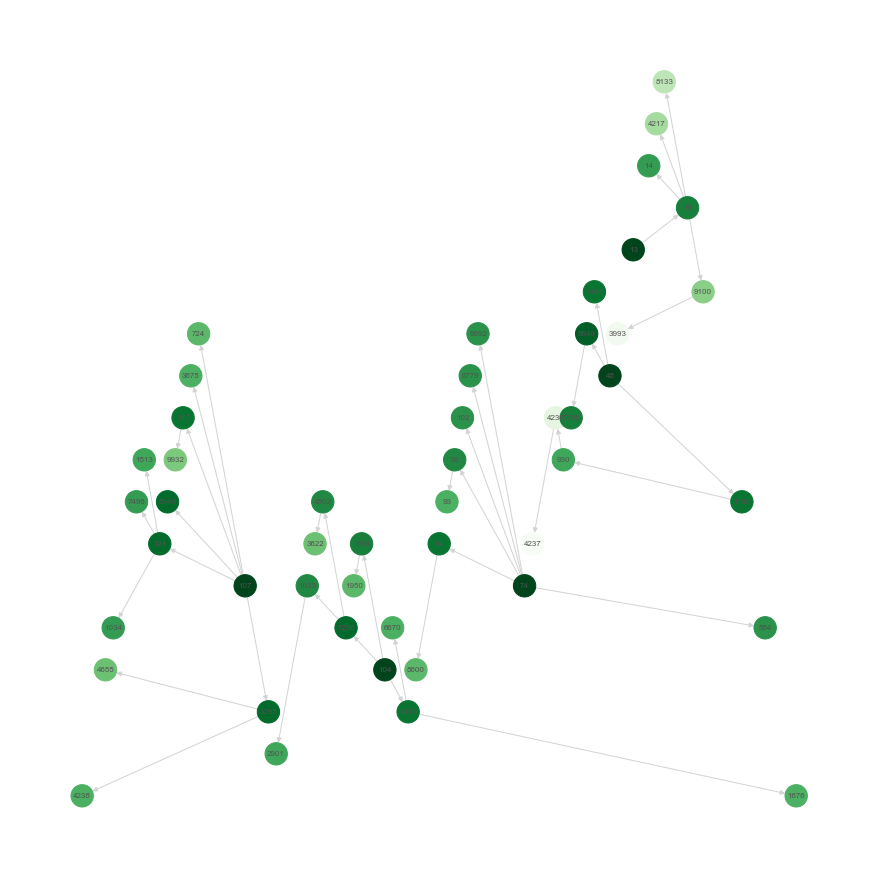

In [147]:
nodes = H.nodes(data=True)
plt.figure(1,figsize=(12,12))
colors = [v['infectionTime'] for u,v in nodes]
# #print(colors)
pos = nx.spring_layout(H, iterations = 1000)
pos = nx.planar_layout(H)
#pos = nx.shell_layout(H)

#kamada_kawai_layout
#pos = nx.kamada_kawai_layout(H)
nx.draw(H, pos=pos, cmap=plt.cm.Greens_r, node_color= colors, node_size = 500, edge_color = '#d3d3d3')
nx.draw_networkx_labels(H, pos=pos, font_size = 8, font_color = '#525252')
plt.show()